## K- nearest neighbors

- You have a dataset that is already classified, for example cell types.
- When a new value enters the dataset you measure the distance to the other values in the dataset.
- Depending on the value of k the following is done, if K = 1 it is assumed that this value belongs to the group that is closest to it, for higher values of K a ranking is done and the majority is chosen. i.e. Imagine that I decide k = 5 and it turns out that the closest value of k = type A but the other 4 closest values are of type B then in this case the new value would be of type B since 4 > 1.


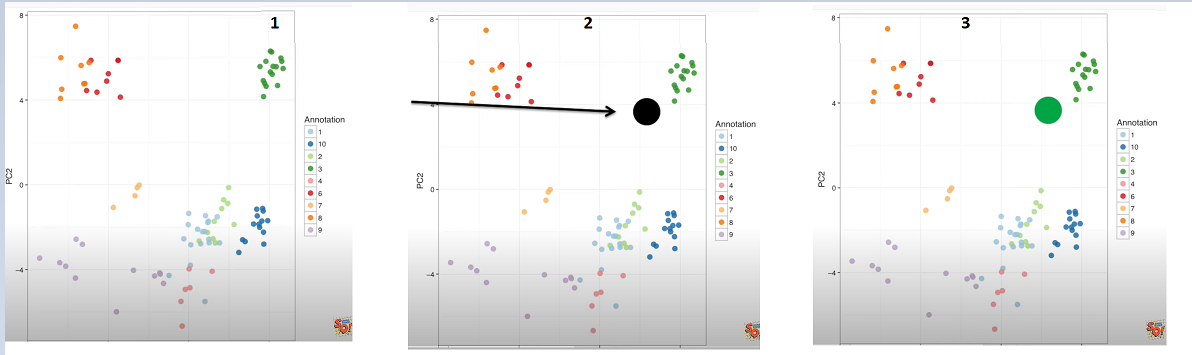

### 1 - Petal classification

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
#import mglearn

iris_dataset = load_iris()

In [2]:
print("Keys of iris_dataset: ", list(iris_dataset.keys()))

print(iris_dataset['DESCR'][:193] + "\n...")

Keys of iris_dataset:  ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [3]:
print("Target names:", iris_dataset['target_names'])
print("Feature names:", iris_dataset['feature_names'])
print("Type of data:", type(iris_dataset['data']))
print("Shape of data --> is based at (rows, columns(features)) in that case: ", iris_dataset['data'].shape)
print("Type of target:", type(iris_dataset['target']))
print("Shape of target:", iris_dataset['target'].shape)

Target names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data: <class 'numpy.ndarray'>
Shape of data --> is based at (rows, columns(features)) in that case:  (150, 4)
Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)


In [4]:
print("First five rows of data:\n", iris_dataset['data'][:5])
print("Target:\n", iris_dataset['target'])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


So Target dataset had 3 different values: 0, 1, 2 that corestpont to the names `setosa`, `versicolor`, `virginica`

In [5]:
#### First Things First: Look at Your Data


# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(iris_dataset['data'], columns=iris_dataset.feature_names)

In [6]:
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

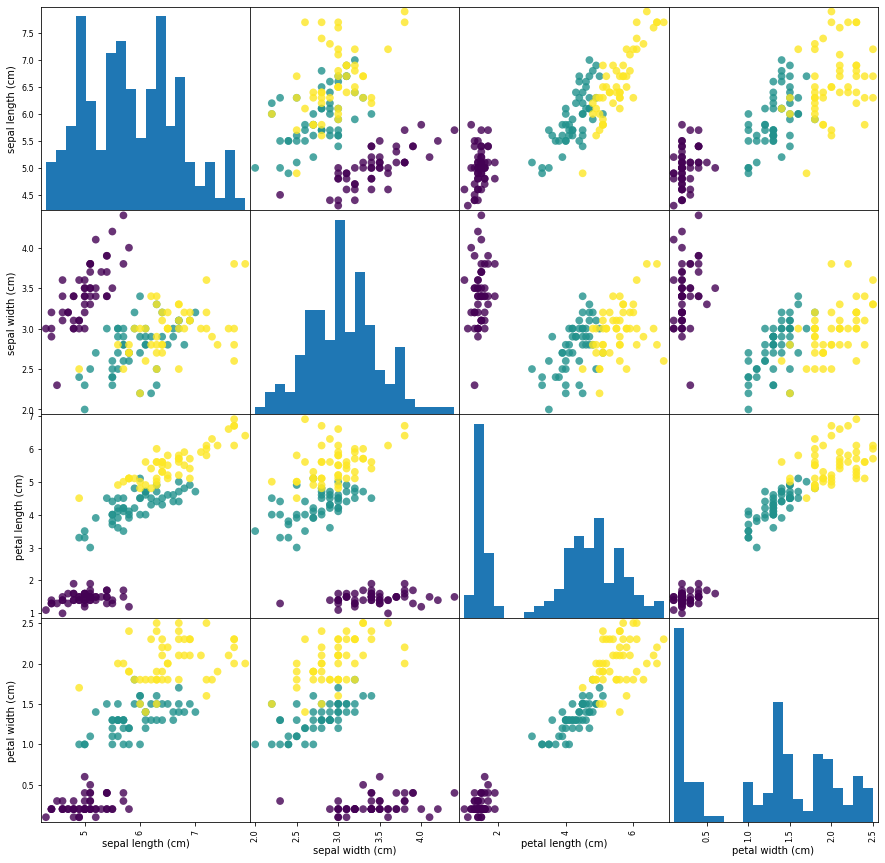

In [7]:
# create a scatter matrix from the dataframe, color by target
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = [15, 8]
pd.plotting.scatter_matrix(iris_dataframe, c=iris_dataset['target'],
                           figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8 )

In [8]:
#### Measuring Success: Training and Testing Data
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


print("\nX_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (112, 4)
y_train shape: (112,)

X_test shape: (38, 4)
y_test shape: (38,)


In [9]:
# #### Building Your First Model: k-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
# Making Predictions
X_new = np.array([[5, 2.9, 1, 0.2]]) # create by hand
print("X_new.shape:", X_new.shape)

prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction][0])



X_new.shape: (1, 4)
Prediction: [0]
Predicted target name: setosa


In [11]:
# #### Evaluating the Model

y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)
print("Test set result:\n", y_test)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set result:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


In [12]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

print("Test set score(other formula): {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
Test set score(other formula): 0.97


### Graphical representation by increasing k

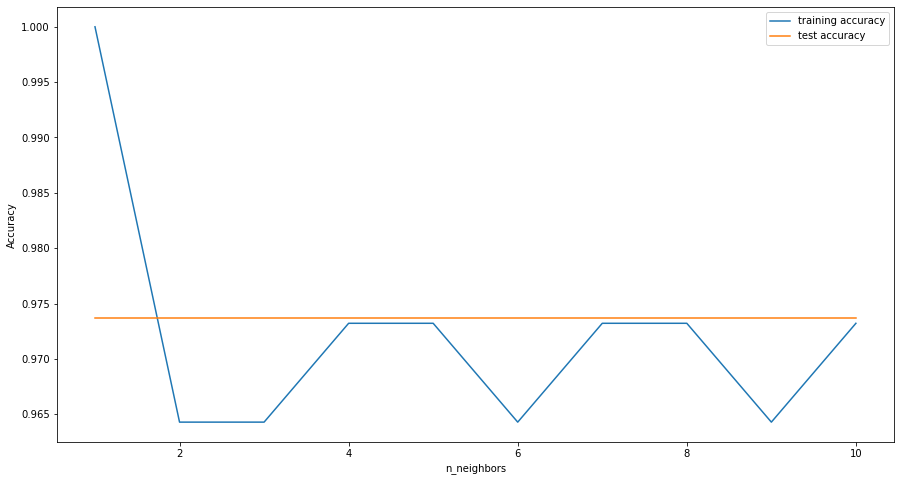

In [15]:
import matplotlib.pyplot as plt

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### End.